<a href="https://colab.research.google.com/github/CarlosMendez1997Col/GeoDatabases-And-Cloud-Computing-For-Water-Resources-Management/blob/main/1-Creation%20Geodatabase/Download_and_Geoprocessing_Databases_in_Google_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download and Geoprocessing Databases in Google Colab

---

> Water Resources Management using PostgreSQL and PgAdmin4

> Area of Interest (South America)

> Developed by MSc Carlos Mendez

MOST TABLES AND DATASETS USED:

1. South America Countries and Boundary
2. First Level Administrative Units (FLAU)
3. Second Level Administrative Units (SLAU)
4. HydroSHEDS (Conditioned DEM)
5. HydroBASINS (Level 1,2,3,4,5,6,7,8,9,10,11 and 12)
6. HydroRIVERS
7. HydroLAKES
8. Global Lakes and Wetlands Database (GLWD)
9. HydroWASTE
10. Global River Classification (GloRiC)
11. Lake TEMP
12. Global Power Plant Database (GPPD)



## Install and import ArcGIS API for Python

In [75]:
# If you need to install any library, please delete commit and then install it
#!pip install arcgis
#!pip install geopandas

## Import libraries and packages

In [76]:
import numpy as np
import pandas as pd
import geopandas as gpd
import math
import os
import time
from datetime import datetime as dt

In [72]:
import arcgis
from arcgis.features import FeatureLayer, FeatureLayerCollection
from arcgis.geometry import SpatialReference

from google.colab import output
output.enable_custom_widget_manager()

# connect to GIS
from arcgis.gis import GIS

## Connect and Login in Arcgis Account

In [65]:
# Prompt user to provide username and password
import getpass
username = input('Enter username: ')
password = getpass.getpass("Enter your password: ")
gis = GIS("https://udistritalfjc.maps.arcgis.com/home", username, password)

Enter username: Camendezv_UDFJC
Enter your password: ··········


## Import and extract Databases in your local computer

1. South America Countries and Boundary [Url Data](https://github.com/wmgeolab/geoBoundaries/raw/main/releaseData/CGAZ/geoBoundariesCGAZ_ADM0.zip)

2. First Level Administrative Units (FLAU) [Url Data](https://github.com/wmgeolab/geoBoundaries/raw/main/releaseData/CGAZ/geoBoundariesCGAZ_ADM1.zip)

3. Second Level Administrative Units (SLAU) [Url Data](https://github.com/wmgeolab/geoBoundaries/raw/main/releaseData/CGAZ/geoBoundariesCGAZ_ADM2.zip)

4. HydroSHEDS (Digital Elevation Model) [Url Data](https://data.hydrosheds.org/file/hydrosheds-v1-dem/hyd_sa_dem_30s.zip)

5. HydroBASINS (Level 1 to 12) [Url Data](https://data.hydrosheds.org/file/hydrobasins/standard/hybas_sa_lev01-12_v1c.zip)

6. HydroRIVERS [Url Data](https://data.hydrosheds.org/file/HydroRIVERS/HydroRIVERS_v10_sa_shp.zip)

7. HydroLAKES [Url Data](https://data.hydrosheds.org/file/hydrolakes/HydroLAKES_polys_v10_shp.zip)

8. Global Lakes and Wetlands Database (GLWD) [Url Data](https://figshare.com/ndownloader/files/54001748)

9. HydroWASTE [Url Data](https://figshare.com/ndownloader/files/31910714)

10. Global River Classification (GloRiC) [Url Data](https://data.hydrosheds.org/file/hydrosheds-associated/gloric/GloRiC_v10_shapefile.zip)

11. Lake TEMP [Url Data](https://figshare.com/ndownloader/files/46397785)

12. Global Power Plant Database (GPPD) [Url Data](https://datasets.wri.org/private-admin/dataset/53623dfd-3df6-4f15-a091-67457cdb571f/resource/66bcdacc-3d0e-46ad-9271-a5a76b1853d2/download/globalpowerplantdatabasev130.zip)

### Connect to Google Drive

In [66]:
import os
os.makedirs('/content', exist_ok=True) # Create the parent directory if it doesn't exist

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [67]:
# Set Directory or WorkSpace
%cd /content/drive/MyDrive/Geodatabase

/content/drive/MyDrive/Geodatabase


### 1. South America Countries and Boundary (SACB)

In [68]:
!wget https://github.com/wmgeolab/geoBoundaries/raw/main/releaseData/CGAZ/geoBoundariesCGAZ_ADM0.zip

--2025-09-09 01:40:24--  https://github.com/wmgeolab/geoBoundaries/raw/main/releaseData/CGAZ/geoBoundariesCGAZ_ADM0.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/wmgeolab/geoBoundaries/main/releaseData/CGAZ/geoBoundariesCGAZ_ADM0.zip [following]
--2025-09-09 01:40:24--  https://media.githubusercontent.com/media/wmgeolab/geoBoundaries/main/releaseData/CGAZ/geoBoundariesCGAZ_ADM0.zip
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 103997008 (99M) [application/zip]
Saving to: ‘geoBoundariesCGAZ_ADM0.zip’

geoBoundariesCGAZ_A 100%[===================>]  99.18M  28.8MB/s    in 3

In [69]:
!unzip geoBoundariesCGAZ_ADM0.zip -d /content/drive/MyDrive/Geodatabase

Archive:  geoBoundariesCGAZ_ADM0.zip
  inflating: /content/drive/MyDrive/Geodatabase/geoBoundariesCGAZ_ADM0.shp  
  inflating: /content/drive/MyDrive/Geodatabase/geoBoundariesCGAZ_ADM0.shx  
  inflating: /content/drive/MyDrive/Geodatabase/geoBoundariesCGAZ_ADM0.dbf  
  inflating: /content/drive/MyDrive/Geodatabase/geoBoundariesCGAZ_ADM0.prj  


In [90]:
SACB = gpd.read_file('geoBoundariesCGAZ_ADM0.shp')
SACB.head(30)

,shapeGroup,shapeType,shapeName,geometry
0,AFG,ADM0,Afghanistan,"POLYGON ((74.88986 37.23409, 74.88962 37.23314..."
1,GBR,ADM0,United Kingdom,"MULTIPOLYGON (((33.01302 34.64377, 33.01275 34..."
2,ALB,ADM0,Albania,"POLYGON ((20.0789 42.5558, 20.07928 42.55546, ..."
3,DZA,ADM0,Algeria,"POLYGON ((8.64194 36.94096, 8.64195 36.9407, 8..."
4,USA,ADM0,United States,"MULTIPOLYGON (((-168.15791 -14.53181, -168.161..."
5,ATA,ADM0,Antarctica,"MULTIPOLYGON (((-60.06171 -79.6813, -60.06636 ..."
6,ATG,ADM0,Antigua & Barbuda,"MULTIPOLYGON (((-62.34839 16.93286, -62.35006 ..."
7,ARG,ADM0,Argentina,"MULTIPOLYGON (((-63.83417 -54.68583, -63.83253..."
8,AND,ADM0,Andorra,"POLYGON ((1.7258 42.5044, 1.71336 42.49383, 1...."
9,AGO,ADM0,Angola,"MULTIPOLYGON (((11.7163 -16.50801, 11.71627 -1..."


In [83]:
SACB.drop(['shapeType','shapeGroup'], axis=1, inplace=True)
SACB.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   shapeName  218 non-null    object  
 1   geometry   218 non-null    geometry
dtypes: geometry(1), object(1)
memory usage: 3.5+ KB


In [97]:
SA_countries =  ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'French Guiana','Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela']
SACB_SA = SACB[SACB['shapeName'].isin(SA_countries)]
SACB_SA.head()

,shapeGroup,shapeType,shapeName,geometry
7,ARG,ADM0,Argentina,"MULTIPOLYGON (((-63.83417 -54.68583, -63.83253..."
21,BOL,ADM0,Bolivia,"POLYGON ((-62.63895 -22.2334, -62.63993 -22.23..."
25,COL,ADM0,Colombia,"MULTIPOLYGON (((-81.60239 4.00762, -81.604 4.0..."
27,BRA,ADM0,Brazil,"MULTIPOLYGON (((-48.41378 -27.38922, -48.41378..."
46,CHL,ADM0,Chile,"MULTIPOLYGON (((-67.08172 -55.81292, -67.07755..."


<Axes: >

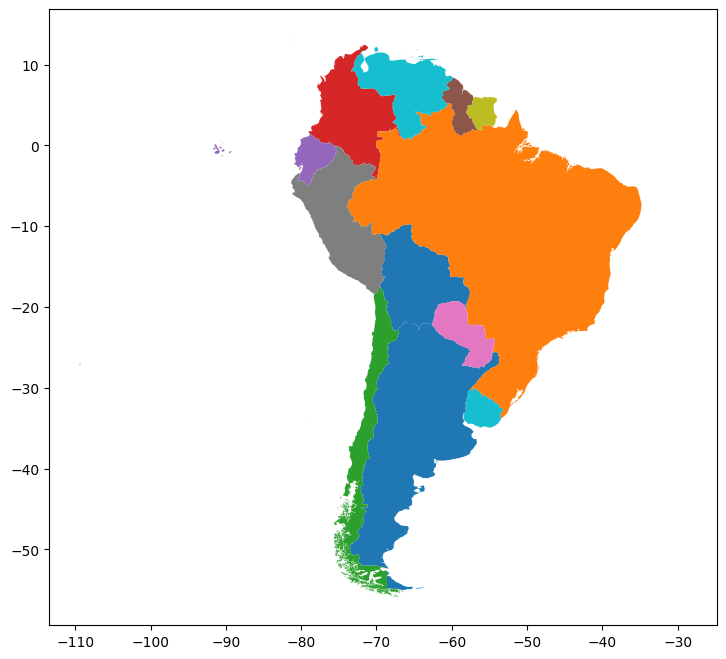

In [98]:
SACB_SA.plot(column='shapeName', figsize=(16,8))

### 2. First Level Administrative Units (FLAU)

In [ ]:
!wget https://github.com/wmgeolab/geoBoundaries/raw/main/releaseData/CGAZ/geoBoundariesCGAZ_ADM1.zip

### 3. Second Level Administrative Units (SLAU)

### 4. HydroSHEDS (Digital Elevation Model)

### 5. HydroBASINS (Level 1 to 12)

### 6. HydroRIVERS

### 7. HydroLAKES

### 8. Global Lakes and Wetlands Database (GLWD)

### 9. HydroWASTE

### 10. Global River Classification (GloRiC)

### 11. LakeTEMP

### 12. Global Power Plant Database (GPPD)

In [ ]:
!ls

geoBoundariesCGAZ_ADM0.zip


In [ ]:
!rm -r /content/

In [ ]:







https://github.com/wmgeolab/geoBoundaries/raw/main/releaseData/CGAZ/geoBoundariesCGAZ_ADM2.zip


https://data.hydrosheds.org/file/hydrosheds-v1-dem/hyd_sa_dem_30s.zip


https://data.hydrosheds.org/file/hydrobasins/standard/hybas_sa_lev01-12_v1c.zip


https://data.hydrosheds.org/file/HydroRIVERS/HydroRIVERS_v10_sa_shp.zip


https://data.hydrosheds.org/file/hydrolakes/HydroLAKES_polys_v10_shp.zip


https://figshare.com/ndownloader/files/54001748


https://figshare.com/ndownloader/files/31910714


https://data.hydrosheds.org/file/hydrosheds-associated/gloric/GloRiC_v10_shapefile.zip


https://figshare.com/ndownloader/files/46397785


https://datasets.wri.org/private-admin/dataset/53623dfd-3df6-4f15-a091-67457cdb571f/resource/66bcdacc-3d0e-46ad-9271-a5a76b1853d2/download/globalpowerplantdatabasev130.zip


!wget your_external_url_to_zip_file.zip